# **Proyek Klasifikasi Gambar**

### **Objektif:**
Membangun sebuah model yang dapat mengklasifikasikan Tumbuhan

### **Sumber Dataset:**
*  https://www.kaggle.com/datasets/yudhaislamisulistya/plants-type-datasets



## **1. Kriteria**

### 1.1 Wajib

| No  |  Kriteria | Dipenuhi  | Catatan  |
|---|---|---|---|
| 1  | Bebas Memilih Dataset yang Ingin Dipakai, tetapi Harus Memiliki Minimal 1000 Gambar  | Ya  | Sumber Data Kaggle (Lihat : **2.4 Dataset**)  |
| 2  | Tidak Diperbolehkan Menggunakan Dataset Rock, Paper, Scissor   | Ya  | -  |
| 3  | Dataset Dibagi Menjadi 80% Train Set dan 20% Test Set  | Ya  | Sudah (Lihat **4. Data Splitting**)  |
| 4  | Model Harus Menggunakan Model Sequential, Conv2D, Pooling Layer  | Ya  | Cek **6.1 Inisialisasi Model**  |
| 5  | Membuat Plot Terhadap Akurasi dan Loss Model  | Ya  | Cek **6.4 Plot Evaluasi Model** |
| 6  | Akurasi pada Training dan Validation Set Minimal Sebesar 85%  | Ya  | Cek **6.5 Hasil Akurasi Model**  |
| 7  | Menyimpan Model ke Dalam Format SavedModel, TF-Lite dan TFJS  | Ya  | Cek **7. Simpan Model**  |

### 1.2 Extra

| No  |  Kriteria | Dipenuhi  | Catatan  |
|---|---|---|---|
| 1  | Gambar-gambar pada dataset memiliki resolusi yang tidak seragam.   | Ya  | Tersedia (Lihat : **2.5 Cek Resolusi**)  |
| 2  | Dataset yang digunakan berisi lebih dari 10,000 gambar.  | Ya  | Jumlah : 26,970 Gambar (Lihat : **2.6 Jumlah Data**)   |
| 3  | Memiliki 3 buah kelas atau lebih.  | Ya  | Jumlah : 30 Kelas (Lihat : **2.7 Jumlah Kelas**)  |
| 4  | Mengimplementasikan Callback  | Ya  | Cek **6.2 Callback** |
| 5  | Akurasi pada training set dan validation set minimal 95%.  | Tidak  | Hasil Train Accuracy: **91.90%** dan Test Accuracy: **88.36%**. Tidak dipaksakan untuk mencapai akurasi tinggi karena Runtime sering terputus.   |
| 6  | Melakukan inference menggunakan salah satu model (TF-Lite, TFJS atau savedmodel dengan tf serving).  | Ya  | Ada di file **Inference.ipynb**  |

## **2. Preparation**

### 2.1 Instalasi Library

In [2]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 113.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 121.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 M

### 2.2 Impor Library

In [37]:
import numpy as np                                    # Mengimpor library numpy untuk operasi numerik
import pandas as pd                                   # Mengimpor library pandas untuk manipulasi data
import tensorflow as tf                               # Mengimpor library tensorflow untuk deep learning
import matplotlib.pyplot as plt                       # Mengimpor library matplotlib untuk visualisasi data
import seaborn as sns                                 # Mengimpor library seaborn untuk visualisasi data
from pathlib import Path                              # Mengimpor Path dari pathlib untuk operasi path
from keras.preprocessing import image                 # Mengimpor modul preprocessing gambar dari Keras
from sklearn.model_selection import train_test_split  # Mengimpor fungsi train_test_split dari scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Mengimpor metrik evaluasi dari scikit-learn
import itertools                                      # Mengimpor modul operasi iterasi untuk menghasilkan semua kombinasi pasangan indeks dari dua range tertentu
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions  # Mengimpor fungsi preprocessing dan decoding dari VGG16
from tensorflow.keras.applications import InceptionV3 # Mengimpor model InceptionV3 dari Keras
from tensorflow.keras.models import Sequential        # Mengimpor class Sequential dari Keras
from tensorflow.keras.layers import Conv2D, Add, Flatten, MaxPooling2D, Dense, BatchNormalization, Input, Flatten, Dropout, GlobalMaxPooling2D, Lambda  # Mengimpor berbagai lapisan dari Keras
from tensorflow.keras.models import Model             # Mengimpor class Model dari Keras
import tensorflowjs as tfjs                           # Mengimpor modul tfjs untuk export model ke format TFJS
from tensorflow.keras.optimizers import Adam, RMSprop # Mengimpor optimizer Adam dan RMSprop dari Keras
from tensorflow.keras.callbacks import LearningRateScheduler  # Mengimpor callback LearningRateScheduler dari Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Mengimpor ImageDataGenerator untuk augmentasi gambar
from tensorflow.keras import mixed_precision          # Mengimpor modul mixed_precision untuk konfigurasi mixed precision
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau # Mengimpor callback ModelCheckpoint dari Keras
from google.colab import files                        # Mengimpor modul files dari Google Colab untuk mengelola file
import ipywidgets as widgets                          # Mengimpor library ipywidgets untuk widget interaktif
from PIL import Image                                 # Mengimpor modul Image dari PIL (Python Imaging Library) untuk manipulasi gambar
import io                                             # Mengimpor modul io untuk operasi input/output
import os                                             # Mengimpor modul os untuk operasi sistem
import time                                           # Mengimpor modul time untuk operasi waktu
from IPython.display import FileLink, FileLinks       # Mengimpor modul FileLink dan FileLinks dari IPython.display untuk menampilkan tautan file
from google.colab import drive                        # Mengimpor modul drive dari Google Colab untuk akses ke Google Drive
import shutil                                         # Mengimpor modul shutil untuk operasi file
import zipfile                                        # Mengimpor modul zipfile untuk operasi file zip
import filecmp                                        # Mengimpor modul filecmp untuk operasi komparasi file
from tensorflow.keras.utils import to_categorical     # Mengimpor fungsi to_categorical dari Keras untuk one-hot encoding
from sklearn.preprocessing import OneHotEncoder       # Mengimpor class OneHotEncoder dari scikit-learn untuk one-hot encoding
import cv2                                            # Mengimpor modul cv2 untuk operasi gambar
import random                                         # Mengimpor modul random untuk operasi random
from tensorflow.keras import layers, models           # Mengimpor lapisan dan model dari Keras
from keras.layers import TFSMLayer                    #

In [4]:
drive.mount('/content/drive')                         # Memunculkan dialog untuk mengakses Google Drive

Mounted at /content/drive


### 2.3 Upload Token Kaggle

In [ ]:
uploaded = files.upload()  # Memunculkan dialog untuk mengunggah file dari komputer lokal ke lingkungan Google Colab

Saving kaggle.json to kaggle.json


In [ ]:
# Memindahkan file ke folder di Google Drive
uploaded_filename = list(uploaded.keys())[0]  # Mengambil nama file yang diunggah

# Path di Google Drive tempat menyimpan file
drive_path = '/content/drive/MyDrive/.kaggle/'

# Pastikan direktori tujuan ada
os.makedirs(drive_path, exist_ok=True)  # Membuat direktori jika belum ada

# Pindahkan file ke Google Drive
shutil.move(uploaded_filename, drive_path + uploaded_filename)

print(f"File {uploaded_filename} berhasil disimpan di Google Drive.")

File kaggle.json berhasil disimpan di Google Drive.


In [ ]:
# Mengatur path ke folder .kaggle di Google Drive
os.environ['KAGGLE_CONFIG_DIR'] = r"/content/drive/MyDrive/.kaggle"

# Cek apakah kaggle.json ada di folder .kaggle
!ls /content/drive/MyDrive/.kaggle

kaggle.json


### 2.4 Dataset

In [ ]:
# Unduh dataset dari Kaggle
!kaggle datasets download -d yudhaislamisulistya/plants-type-datasets -p /content/drive/MyDrive/plants-type-datasets # Perintah untuk mengunduh dataset dari Kaggle menggunakan ID dataset

Dataset URL: https://www.kaggle.com/datasets/yudhaislamisulistya/plants-type-datasets
License(s): copyright-authors
100% 935M/937M [01:01<00:00, 16.7MB/s]
100% 937M/937M [01:02<00:00, 15.8MB/s]


In [ ]:
zip_path = '/content/drive/MyDrive/plants-type-datasets/plants-type-datasets.zip'
extract_to = '/content/drive/MyDrive/plants-type-datasets'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")

Extraction complete.


In [5]:
# Direktori baru untuk dataset gabungan
combined_dir = "/content/drive/MyDrive/plants-type-datasets/dataset"

In [ ]:
# Direktori awal untuk train dan test
train_dir = "/content/drive/MyDrive/plants-type-datasets/split_ttv_dataset_type_of_plants/Train_Set_Folder"
test_dir = "/content/drive/MyDrive/plants-type-datasets/split_ttv_dataset_type_of_plants/Test_Set_Folder"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

def move_and_check(src_dir, dest_dir):
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            src_file = os.path.join(root, file)
            rel_path = os.path.relpath(src_file, src_dir)
            dest_file = os.path.join(dest_dir, rel_path)
            dest_file_dir = os.path.dirname(dest_file)

            if not os.path.exists(dest_file_dir):
                os.makedirs(dest_file_dir)

            if os.path.exists(dest_file):
                if filecmp.cmp(src_file, dest_file, shallow=False):
                    os.remove(src_file)  # Hapus file sumber jika kontennya sama
                else:
                    base, ext = os.path.splitext(file)
                    new_file = f"{base}_new{ext}"
                    dest_file = os.path.join(dest_file_dir, new_file)
                    shutil.move(src_file, dest_file)
            else:
                shutil.move(src_file, dest_file)

# Pindahkan file dan folder dari train
move_and_check(train_dir, combined_dir)

# Pindahkan file dan folder dari test
move_and_check(test_dir, combined_dir)

In [ ]:
# Direktori yang ingin dihapus
shutil.rmtree('/content/drive/MyDrive/plants-type-datasets/split_ttv_dataset_type_of_plants')

In [ ]:
# Hapus Zip
!rm -rf '/content/drive/MyDrive/plants-type-datasets/plants-type-datasets.zip'

In [6]:
# Direktori tempat gambar disimpan
directory_path = Path(combined_dir)

# Mendapatkan semua jalur file gambar dengan ekstensi .png dan .jpg/.jpeg
filepaths_png = list(directory_path.glob(r'**/*.png'))
filepaths_jpeg = list(directory_path.glob(r'**/*.jpg')) + list(directory_path.glob(r'**/*.jpeg'))
filepaths = filepaths_png + filepaths_jpeg

# Mendapatkan label dari nama folder
labels = [os.path.split(os.path.split(x)[0])[1] for x in filepaths]

# Mengubah jalur file menjadi DataFrame dan mengonversi ke tipe string
filepaths = pd.DataFrame(filepaths, columns=['Filepath']).astype(str)

# Mengubah label menjadi DataFrame
labels = pd.DataFrame(labels, columns=['Label'])

# Menggabungkan DataFrame filepaths dan labels
image_df = pd.concat([filepaths, labels], axis=1)

# Mengacak DataFrame dan mengatur ulang indeks
image_df = image_df.sample(frac=1).reset_index(drop=True)

# Menampilkan jumlah total gambar yang berhasil ditemukan
image_df = pd.concat([filepaths, labels], axis=1)  # Menggabungkan DataFrame filepaths dan labels
image_df = image_df.sample(frac=1).reset_index(drop=True) # Mengacak DataFrame dan mengatur ulang indeks
image_df.head(10) # Menampilkan 10 baris pertama dari DataFrame

,Filepath,Label
0,/content/drive/MyDrive/plants-type-datasets/da...,curcuma
1,/content/drive/MyDrive/plants-type-datasets/da...,aloevera
2,/content/drive/MyDrive/plants-type-datasets/da...,corn
3,/content/drive/MyDrive/plants-type-datasets/da...,aloevera
4,/content/drive/MyDrive/plants-type-datasets/da...,papaya
5,/content/drive/MyDrive/plants-type-datasets/da...,galangal
6,/content/drive/MyDrive/plants-type-datasets/da...,galangal
7,/content/drive/MyDrive/plants-type-datasets/da...,cassava
8,/content/drive/MyDrive/plants-type-datasets/da...,peper chili
9,/content/drive/MyDrive/plants-type-datasets/da...,curcuma


In [6]:
image_df.info() # Menampilkan informasi DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14516 entries, 0 to 14515
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  14516 non-null  object
 1   Label     14516 non-null  object
dtypes: object(2)
memory usage: 226.9+ KB


### 2.5 Cek Resolusi

In [7]:
def display_sample_image_resolutions(directory, sample_size=10):
    images = []  # Membuat list kosong untuk menyimpan path gambar
    for root, _, files in os.walk(directory):  # Mengiterasi melalui directory secara rekursif
        for file in files:  # Mengiterasi melalui semua file dalam direktori
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):  # Mengecek apakah file memiliki ekstensi gambar yang valid
                images.append(os.path.join(root, file))  # Menambahkan path file ke list images

    if len(images) > sample_size:
        sample_images = random.sample(images, sample_size)  # Mengambil sejumlah gambar secara acak sesuai dengan sample_size dari list images
    else:
        sample_images = images  # Jika jumlah gambar lebih sedikit dari sample_size, gunakan semua gambar

    for img_path in sample_images:  # Mengiterasi melalui sample_images
        try:
            with Image.open(img_path) as img:  # Mencoba membuka gambar menggunakan PIL
                width, height = img.size  # Mendapatkan ukuran (lebar dan tinggi) gambar
                print(f"Image: {img_path}, Resolution: {width}x{height}")  # Mencetak path gambar dan resolusinya
        except (IOError, SyntaxError) as e:  # Menangkap kesalahan jika ada masalah membuka atau membaca gambar
            print(f"Error processing file {img_path}: {e}")  # Mencetak pesan error

# Panggil fungsi
display_sample_image_resolutions(directory_path, sample_size=20)

Image: /content/drive/MyDrive/plants-type-datasets/dataset/aloevera/aug_0_8189.jpg, Resolution: 201x251
Image: /content/drive/MyDrive/plants-type-datasets/dataset/bilimbi/aug_0_430.jpg, Resolution: 500x500
Image: /content/drive/MyDrive/plants-type-datasets/dataset/cassava/aug_0_7164.jpg, Resolution: 305x165
Image: /content/drive/MyDrive/plants-type-datasets/dataset/shallot/aug_0_5195.jpg, Resolution: 1024x1024
Image: /content/drive/MyDrive/plants-type-datasets/dataset/corn/aug_0_7369.jpg, Resolution: 360x360
Image: /content/drive/MyDrive/plants-type-datasets/dataset/corn/aug_0_8574.jpg, Resolution: 190x265
Image: /content/drive/MyDrive/plants-type-datasets/dataset/cantaloupe/aug_0_7704.jpg, Resolution: 300x168
Image: /content/drive/MyDrive/plants-type-datasets/dataset/corn/aug_0_6866.jpg, Resolution: 183x275
Image: /content/drive/MyDrive/plants-type-datasets/dataset/watermelon/watermelon435.jpg, Resolution: 268x268
Image: /content/drive/MyDrive/plants-type-datasets/dataset/kale/aug_0_2

### 2.6 Jumlah Data

In [8]:
# Ekstensi gambar yang ingin dihitung
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']

# Fungsi untuk memeriksa apakah suatu file adalah gambar
def is_image_file(filename):
    return any(filename.endswith(extension) for extension in image_extensions)

# Menghitung jumlah file gambar dalam direktori
def count_image_files(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if is_image_file(file):
                count += 1
    return count

# Menghitung jumlah file gambar dalam direktori
n_image_files = count_image_files(directory_path)
print(f"Jumlah file gambar: {n_image_files}")

Jumlah file gambar: 14516


### 2.7 Jumlah Kelas

In [9]:
# Fungsi untuk memeriksa apakah ada file gambar di dalam folder
def has_image_files(folder_path):
    for file in os.listdir(folder_path):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            return True
    return False

# Menghitung jumlah folder yang berisi gambar
def count_folders_with_images(directory):
    count = 0
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path) and has_image_files(folder_path):
            count += 1
    return count

# Menghitung jumlah folder yang berisi gambar
n_folders_with_images = count_folders_with_images(directory_path)
print(f"Jumlah folder yang berisi gambar: {n_folders_with_images}")

Jumlah folder yang berisi gambar: 30


## **3. Plot Gambar**

### 3.1 Plot Gambar Sampel (Random 3 Kelas)

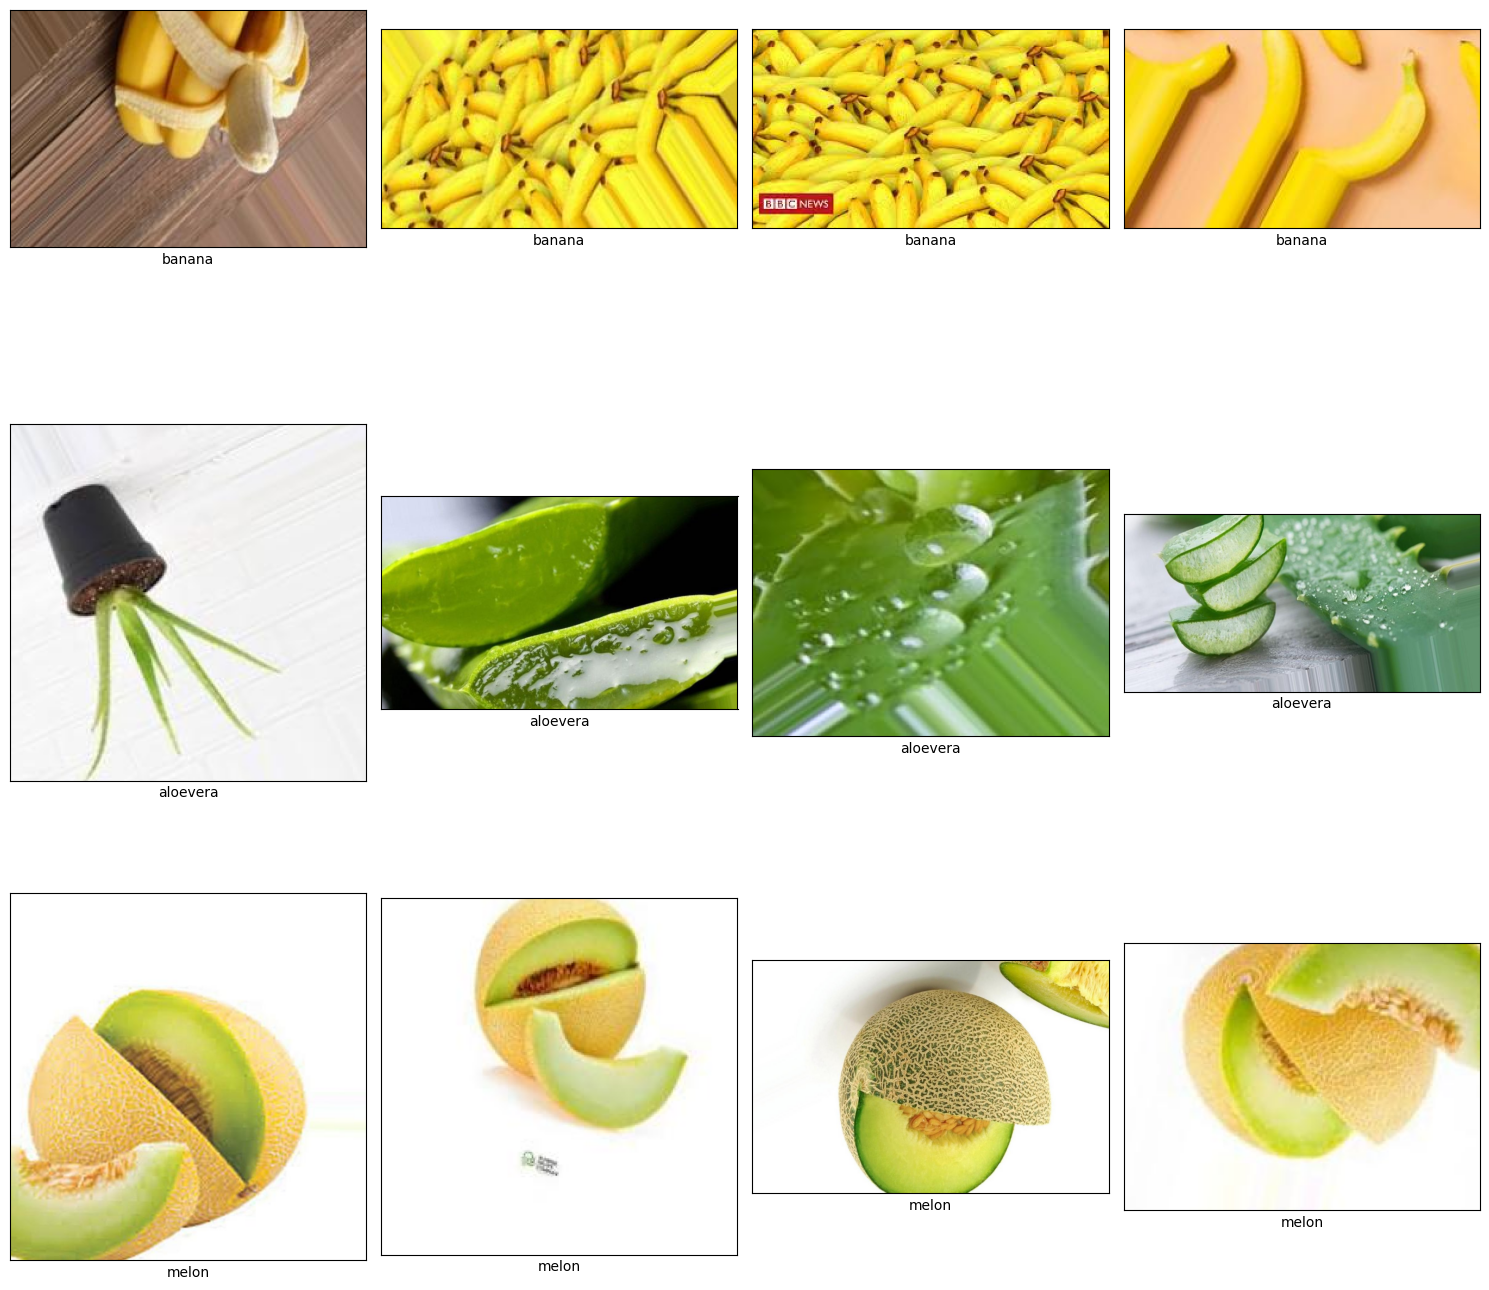

In [7]:
dataset_img = {} # Membuat dictionary yang menyimpan nama-nama file gambar untuk setiap kelas dalam data

for class_name in os.listdir(directory_path): # Mengiterasi setiap direktori (kelas) dalam direktori utama
    dataset_img[class_name] = os.listdir(os.path.join(directory_path, class_name)) # Menyimpan daftar file gambar untuk setiap kelas

# Pilih secara acak 3 kelas dari dataset
random_classes = np.random.choice(list(dataset_img.keys()), 3, replace=False) # Memilih 3 kelas secara acak dari keys dataset_img tanpa penggantian

# Menampilkan secara acak 4 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(random_classes), 4, figsize=(15, 15)) # Membuat subplot dengan jumlah baris sesuai dengan jumlah kelas acak dan 4 kolom, ukuran figur 15x15

for i, class_name in enumerate(random_classes): # Mengiterasi kelas acak
    images = np.random.choice(dataset_img[class_name], 4, replace=False) # Memilih 4 gambar secara acak dari daftar gambar dalam kelas tanpa penggantian

    for j, image_name in enumerate(images): # Mengiterasi gambar acak dalam kelas
        img_path = os.path.join(directory_path, class_name, image_name) # Mendapatkan path lengkap dari gambar
        img = Image.open(img_path) # Membuka gambar menggunakan PIL
        axs[i, j].imshow(img) # Menampilkan gambar pada subplot yang sesuai
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[]) # Mengatur label sumbu x dengan nama kelas dan menghapus ticks sumbu x dan y
        img.close()  # Tutup gambar setelah digunakan untuk menghemat memori

fig.tight_layout() # Mengatur layout figur agar lebih rapi
plt.show() # Menampilkan figur

### 3.2 Plot Distribusi Gambar di Kelas

<ipython-input-8-03604ae8f1ee>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_data.set_xticklabels(plot_data.get_xticklabels(), rotation=45, horizontalalignment='right') # Mengatur label sumbu x dengan rotasi 45 derajat dan perataan kanan


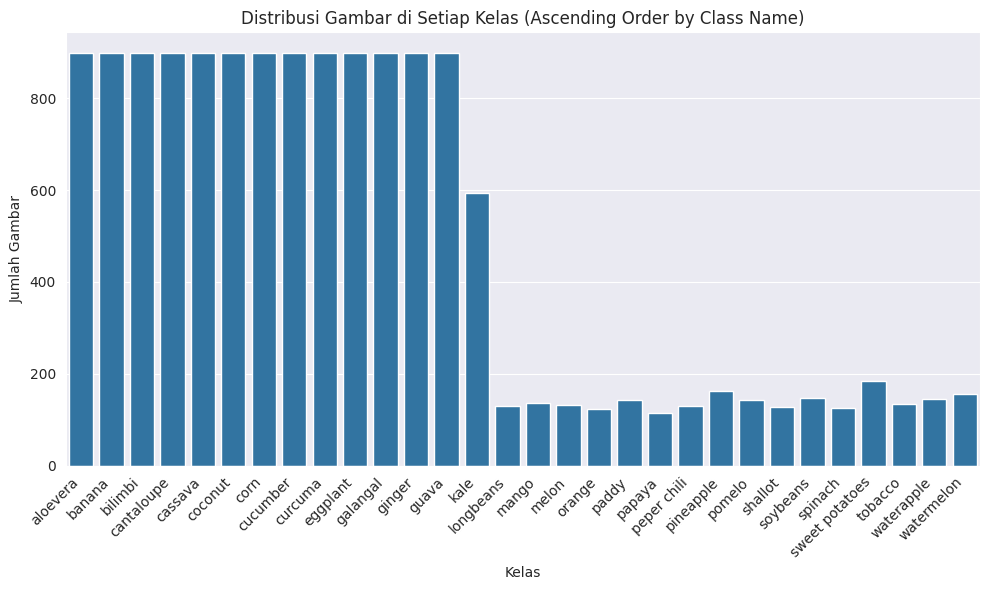

In [8]:
# Membuat list untuk menyimpan data setiap nama file, path lengkap, dan label dalam data
file_name = [] # List untuk menyimpan nama file gambar
labels = [] # List untuk menyimpan label (nama kelas) gambar
full_path = [] # List untuk menyimpan path lengkap gambar

# Mendapatkan nama file gambar, path lengkap, dan label satu per satu menggunakan os.walk
for path, subdirs, files in os.walk(directory_path): # Mengiterasi direktori secara rekursif
    for name in files: # Mengiterasi semua file dalam direktori saat ini
        full_path.append(os.path.join(path, name)) # Menambahkan path lengkap gambar ke list full_path
        labels.append(path.split('/')[-1]) # Menambahkan nama kelas (label) ke list labels
        file_name.append(name) # Menambahkan nama file ke list file_name

# Membuat dataframe untuk menyimpan data yang dikumpulkan
distribution_data = pd.DataFrame({ # Membuat dataframe dengan kolom path, file_name, dan labels
    "path": full_path,
    'file_name': file_name,
    "labels": labels
})

# Mengubah kolom 'labels' pada dataframe 'distribution_data' menjadi tipe data kategori
distribution_data['labels'] = distribution_data['labels'].astype('category') # Mengubah tipe data kolom 'labels' menjadi kategori

# Plotting distribusi jumlah gambar di setiap kelas
plt.figure(figsize=(10, 6)) # Mengatur ukuran figur
sns.set_style("darkgrid") # Mengatur gaya plot menjadi darkgrid
plot_data = sns.countplot(x='labels', data=distribution_data, order=distribution_data['labels'].cat.categories) # Membuat countplot jumlah gambar di setiap kelas
plot_data.set_xticklabels(plot_data.get_xticklabels(), rotation=45, horizontalalignment='right') # Mengatur label sumbu x dengan rotasi 45 derajat dan perataan kanan
plt.xlabel('Kelas') # Mengatur label sumbu x
plt.ylabel('Jumlah Gambar') # Mengatur label sumbu y
plt.title('Distribusi Gambar di Setiap Kelas (Ascending Order by Class Name)') # Mengatur judul plot
plt.tight_layout() # Mengatur layout agar lebih rapi
plt.show() # Menampilkan plot

## **4. Data Splitting**

In [9]:
# Membagi dataset menjadi training dan test_val dengan stratifikasi
train_df, test_val_df = train_test_split(
    distribution_data, test_size=0.2, shuffle=True, random_state=1, stratify=distribution_data['labels'])

# Membagi test_val menjadi validation dan test dengan stratifikasi
validation_df, test_df = train_test_split(
    test_val_df, test_size=0.5, shuffle=True, random_state=1, stratify=test_val_df['labels'])

print(f"Jumlah kelas di train_df: {train_df['labels'].nunique()}")
print(f"Jumlah kelas di validation_df: {validation_df['labels'].nunique()}")
print(f"Jumlah kelas di test_df: {test_df['labels'].nunique()}")

Jumlah kelas di train_df: 30
Jumlah kelas di validation_df: 30
Jumlah kelas di test_df: 30


In [10]:
# Mengganti nama kolom agar sesuai dengan flow_from_dataframe
train_df = train_df.rename(columns={'path': 'Filepath', 'labels': 'Label'})
validation_df = validation_df.rename(columns={'path': 'Filepath', 'labels': 'Label'})
test_df = test_df.rename(columns={'path': 'Filepath', 'labels': 'Label'})

## **5. Image Data Generator**

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Mengubah nilai piksel menjadi rentang 0-1 untuk mempercepat pelatihan
    shear_range=0.2,           # Mengaplikasikan transformasi shear secara acak
    width_shift_range=0.2,     # Menggeser gambar secara horizontal secara acak
    height_shift_range=0.2,    # Menggeser gambar secara vertikal secara acak
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    rescale=1.0/255            # Mengubah nilai piksel pada data validasi menjadi rentang 0-1
)

test_generator = ImageDataGenerator(
    rescale=1.0/255            # Mengubah nilai piksel pada data uji menjadi rentang 0-1
)

In [12]:
# Fungsi untuk memeriksa validitas jalur file
def is_valid_file(path):
    return os.path.exists(path) and os.path.isfile(path)

# Menghapus baris dengan jalur file tidak valid dari DataFrame
def remove_invalid_filepaths(df, filepath_col):
    valid_df = df[df[filepath_col].apply(is_valid_file)].copy()
    return valid_df

# Memperbaiki DataFrame train_df, validation_df, dan test_df
train_df = remove_invalid_filepaths(train_df, 'Filepath')
validation_df = remove_invalid_filepaths(validation_df, 'Filepath')
test_df = remove_invalid_filepaths(test_df, 'Filepath')

print(f"Jumlah data train setelah validasi: {len(train_df)}")
print(f"Jumlah data validation setelah validasi: {len(validation_df)}")
print(f"Jumlah data test setelah validasi: {len(test_df)}")

Jumlah data train setelah validasi: 11612
Jumlah data validation setelah validasi: 1452
Jumlah data test setelah validasi: 1452


In [13]:
train_images = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',           # Kolom yang berisi jalur file gambar
    y_col='Label',              # Kolom yang berisi label kelas
    target_size=(150, 150),     # Ukuran gambar setelah dimuat
    color_mode='rgb',           # Mode warna gambar (RGB)
    class_mode='categorical',   # Mode kelas output untuk klasifikasi multi-kelas
    batch_size=32,              # Jumlah gambar yang diproses per batch
    shuffle=True,               # Mengacak data setiap epoch
    seed=42,                    # Seed untuk hasil acak yang konsisten
)

val_images = valid_datagen.flow_from_dataframe(
    dataframe=validation_df,
    x_col='Filepath',           # Kolom yang berisi jalur file gambar
    y_col='Label',              # Kolom yang berisi label kelas
    target_size=(150, 150),     # Ukuran gambar setelah dimuat
    color_mode='rgb',           # Mode warna gambar (RGB)
    class_mode='categorical',   # Mode kelas output untuk klasifikasi multi-kelas
    batch_size=32,              # Jumlah gambar yang diproses per batch
    shuffle=True,               # Mengacak data setiap epoch
    seed=42,                    # Seed untuk hasil acak yang konsisten
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',           # Kolom yang berisi jalur file gambar
    y_col='Label',              # Kolom yang berisi label kelas
    target_size=(150, 150),     # Ukuran gambar setelah dimuat
    color_mode='rgb',           # Mode warna gambar (RGB)
    class_mode='categorical',   # Mode kelas output untuk klasifikasi multi-kelas
    batch_size=32,              # Jumlah gambar yang diproses per batch
    shuffle=False               # Tidak melakukan pengacakan pada data uji
)

Found 11612 validated image filenames belonging to 30 classes.
Found 1452 validated image filenames belonging to 30 classes.
Found 1452 validated image filenames belonging to 30 classes.


## **6. Pemodelan**

In [14]:
if tf.config.list_physical_devices('GPU'):
    print("Using GPU")
else:
    print("Using CPU")

Using GPU


In [15]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jul 21 06:59:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              44W / 400W |      5MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

### 6.1 Inisialisasi Model

In [16]:
num_classes = len(train_images.class_indices)
print(num_classes)

30


In [48]:
# Inisialisasi model Sequential
model = Sequential()

# Tambahkan layer konvolusi pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer konvolusi kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer konvolusi ketiga
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer konvolusi keempat
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten output dari layer sebelumnya menjadi vektor
model.add(Flatten())

# Tambahkan fully connected layer pertama
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout untuk menghindari overfitting

# Tambahkan output layer dengan fungsi aktivasi softmax untuk klasifikasi multikelas
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile model dengan optimizer Adam dan loss function categorical_crossentropy
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Tampilkan ringkasan model untuk melihat jumlah parameter dan struktur lapisan
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │          15,390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,467,998 (13.23 MB)

 Trainable params: 3,467,998 (13.23 MB)

 Non-trainable params: 0 (0.00 B)

### 6.2 Callback

In [51]:
# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, monitor='val_loss')
]

### 6.3 Training model menggunakan TensorFlow/Keras

In [52]:
# Melatih model
%time
start_time = time.time()

# Fit the model with callbacks
history = model.fit(
    train_images,
    epochs=30,
    batch_size=32,
    validation_data=val_images,
    callbacks=callbacks
)

execution_time = time.time() - start_time
print(f"Execution time: {execution_time:.2f} seconds")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 110s 287ms/step - accuracy: 0.1872 - loss: 2.7582 - val_accuracy: 0.4304 - val_loss: 1.8533 - learning_rate: 0.0010
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 104s 280ms/step - accuracy: 0.3992 - loss: 1.9891 - val_accuracy: 0.4869 - val_loss: 1.6975 - learning_rate: 0.0010
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 102s 275ms/step - accuracy: 0.4542 - loss: 1.8046 - val_accuracy: 0.5634 - val_loss: 1.4273 - learning_rate: 0.0010
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 101s 273ms/step - accuracy: 0.5091 - loss: 1.6058 - val_accuracy: 0.5647 - val_loss: 1.4313 - learning_rate: 0.0010
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 101s 274ms/step - accuracy: 0.5395 - loss: 1.5003 - val_accuracy: 0.5696 - val_loss: 1.4299 - learning_rate: 0.0010
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 102s 275ms/step - accuracy: 0.5862 - loss: 1.3631 - val_accuracy: 0.6494 - val_loss: 1.2065 - learning_rate: 0.0010
E

### 6.4 Plot Evaluasi Model

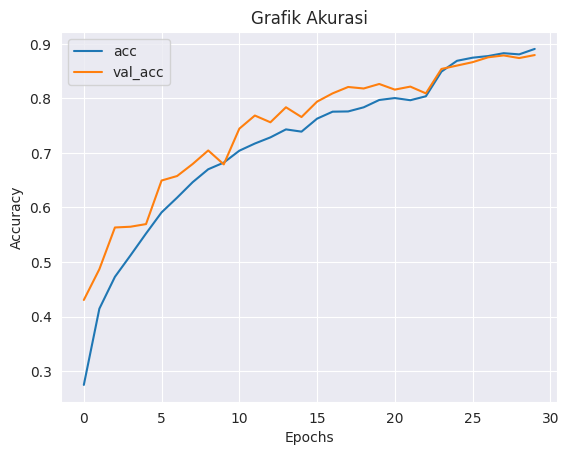

In [53]:
plt.plot(history.history['accuracy'], label='acc')  # Menggambar plot garis untuk akurasi pada setiap epoch dari riwayat pelatihan
plt.plot(history.history['val_accuracy'], label='val_acc')  # Menggambar plot garis untuk val_accuracy (akurasi validasi) pada setiap epoch dari riwayat pelatihan
plt.title('Grafik Akurasi')  # Menambahkan judul pada grafik Akurasi
plt.xlabel('Epochs')  # Menambahkan label pada sumbu X
plt.ylabel('Accuracy')  # Menambahkan label pada sumbu Y
plt.legend()  # Menampilkan legenda plot untuk membedakan antara acc dan val_acc
plt.grid(True)  # Menambahkan grid pada grafik (opsional)
plt.show()  # Menampilkan grafik

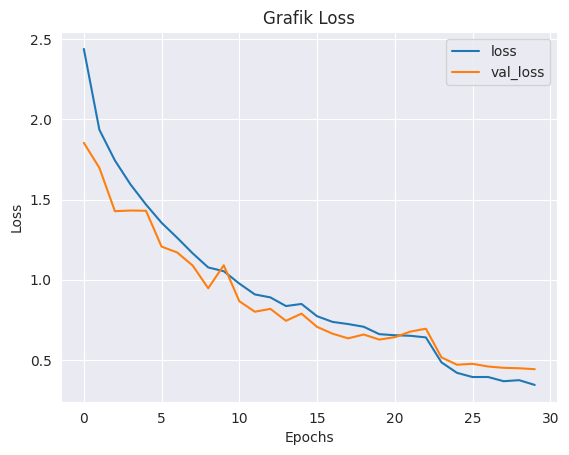

In [54]:
plt.plot(history.history['loss'], label='loss')  # Menggambar plot garis untuk loss pada setiap epoch dari riwayat pelatihan
plt.plot(history.history['val_loss'], label='val_loss')  # Menggambar plot garis untuk val_loss (kerugian validasi) pada setiap epoch dari riwayat pelatihan
plt.title('Grafik Loss')  # Menambahkan judul pada grafik Loss
plt.xlabel('Epochs')  # Menambahkan label pada sumbu X
plt.ylabel('Loss')  # Menambahkan label pada sumbu Y
plt.legend()  # Menampilkan legenda plot untuk membedakan antara loss dan val_loss
plt.grid(True)  # Menambahkan grid pada grafik (opsional)
plt.show()  # Menampilkan grafik

46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step
Confusion Matrix
Normalized confusion matrix
Classification Report
                precision    recall  f1-score   support

      aloevera       0.83      0.84      0.84        90
        banana       0.94      0.97      0.95        90
       bilimbi       0.88      0.92      0.90        90
    cantaloupe       0.89      0.94      0.92        90
       cassava       0.89      0.99      0.94        90
       coconut       0.89      0.93      0.91        90
          corn       0.94      0.99      0.96        90
      cucumber       0.91      0.89      0.90        90
       curcuma       0.95      0.92      0.94        90
      eggplant       0.95      1.00      0.97        90
      galangal       0.89      0.92      0.91        90
        ginger       0.88      0.87      0.87        90
         guava       0.90      0.94      0.92        90
          kale       0.79      0.90      0.84        59
     longbeans       0.71      0.77      0.74      

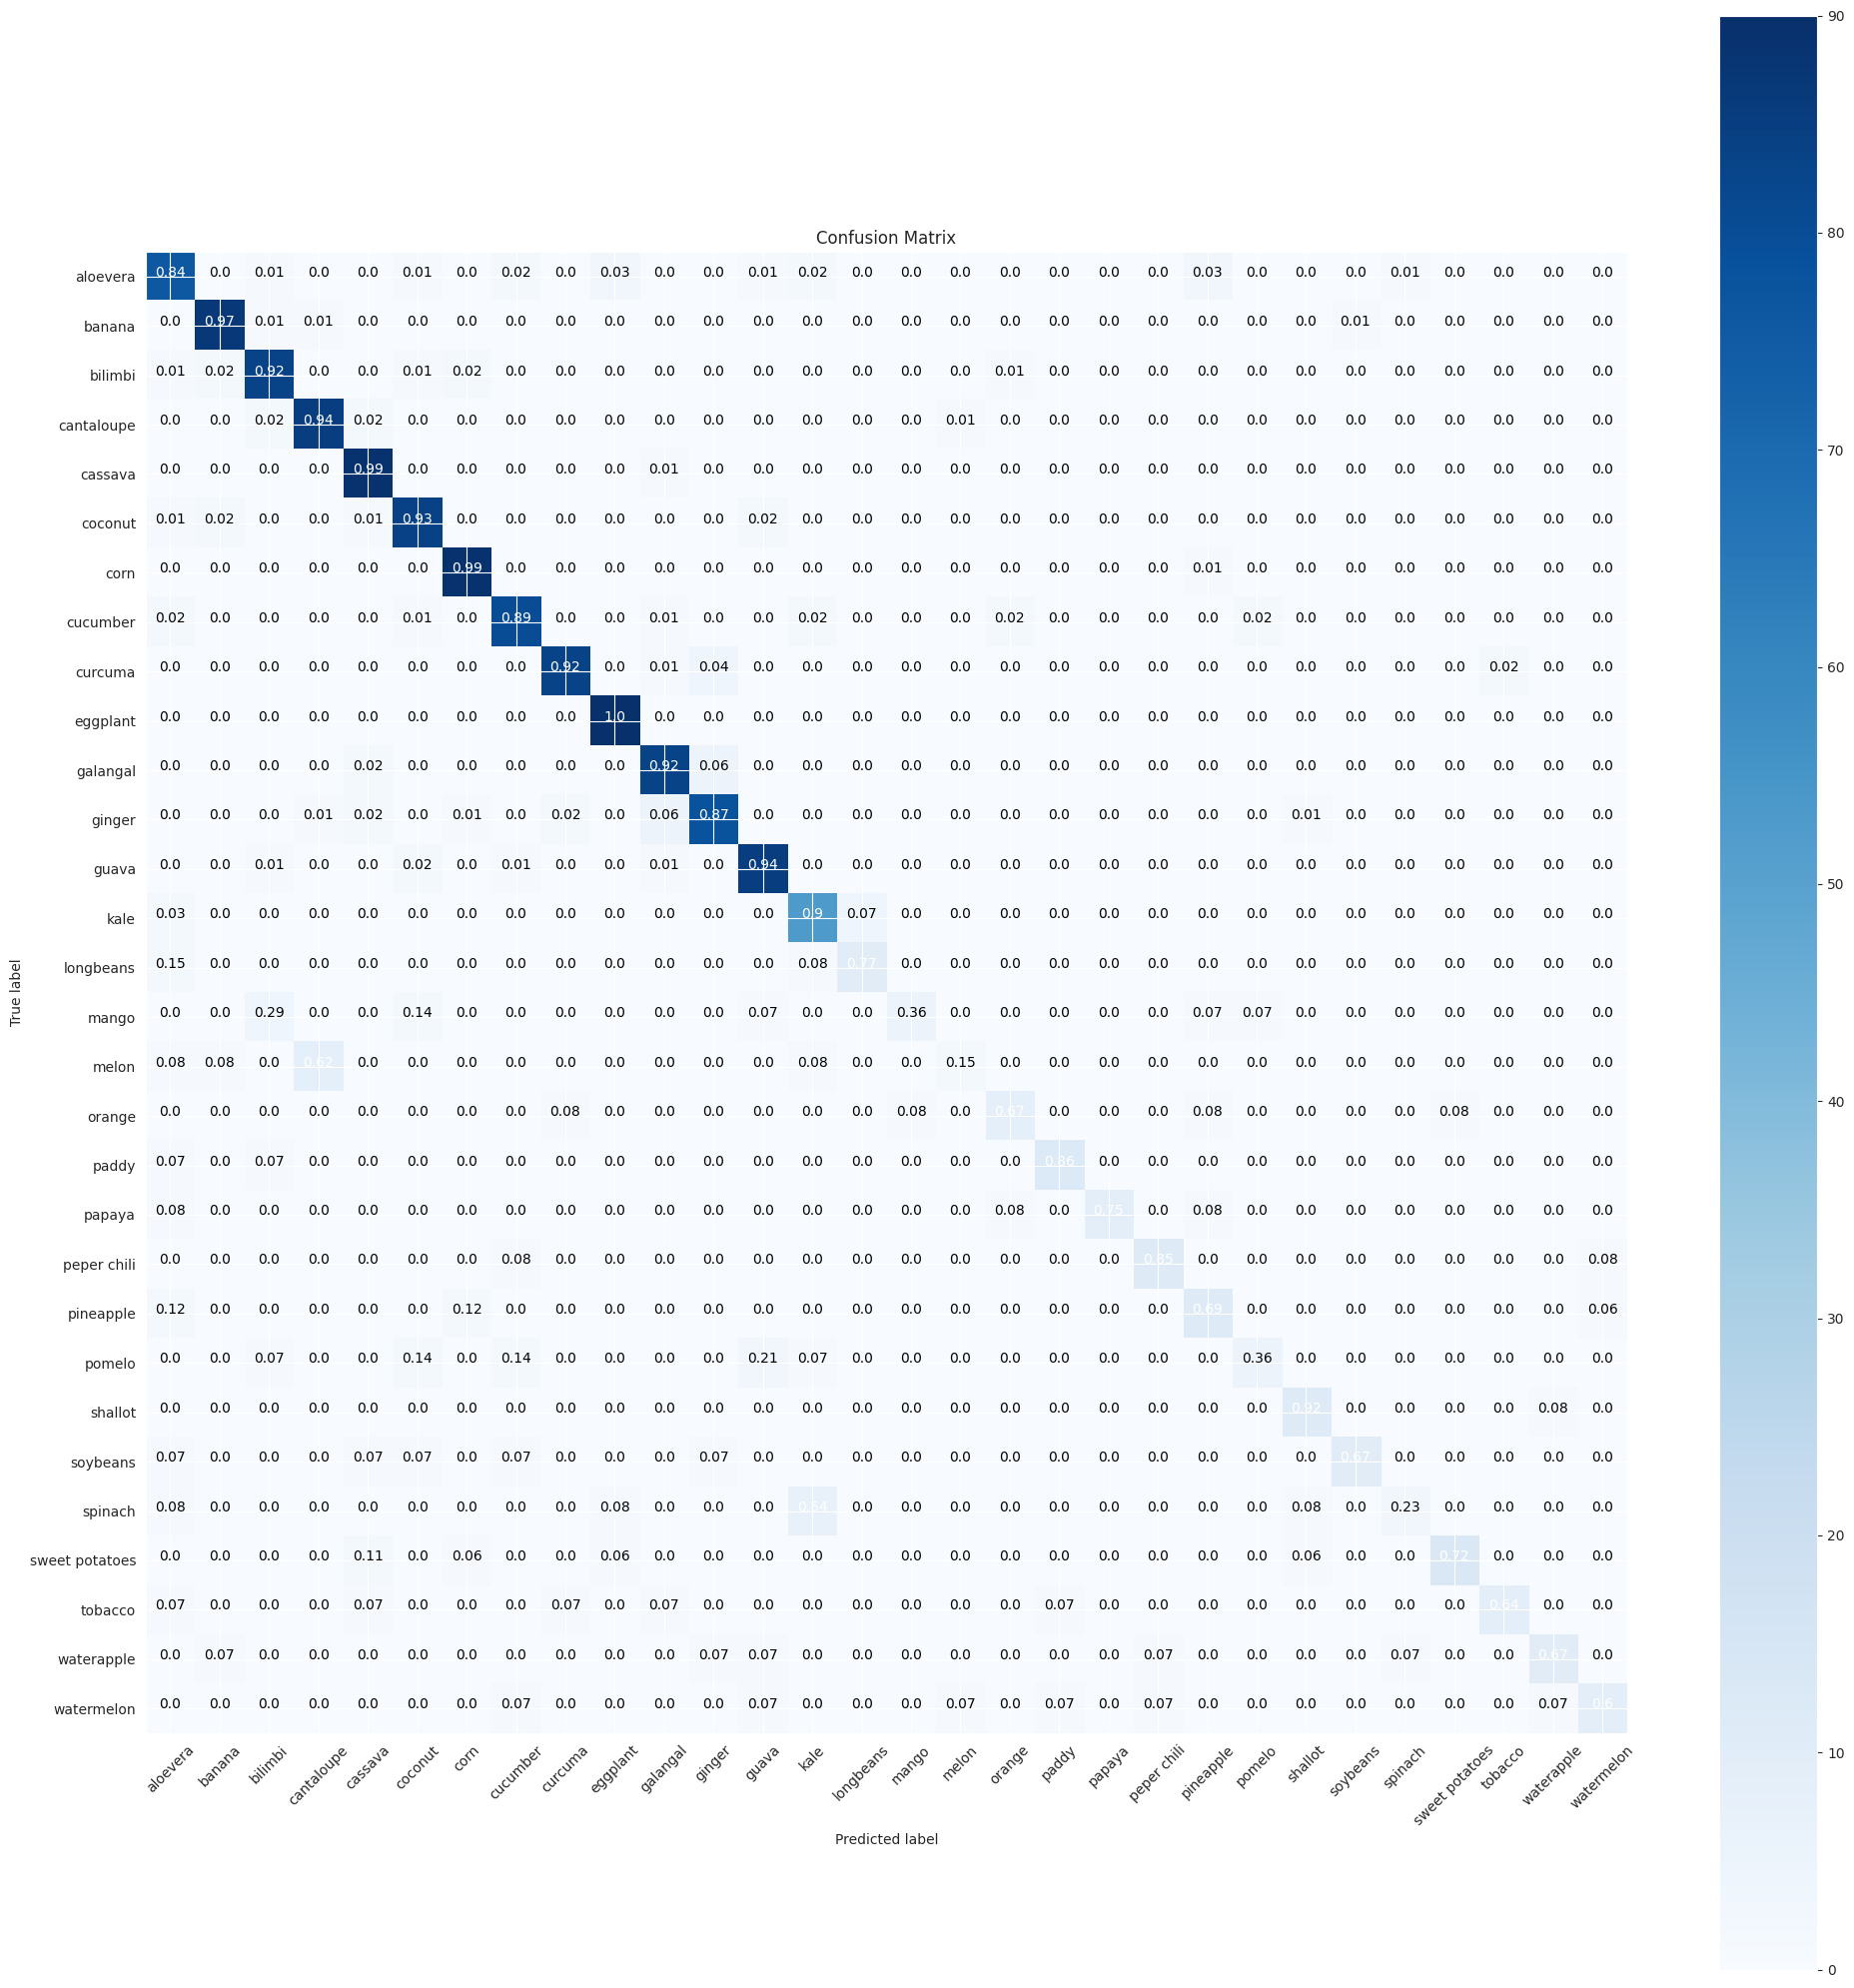

In [55]:
# Fungsi untuk memplot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap='Blues'):
    plt.figure(figsize=(20, 20))  # Mengatur ukuran gambar plot

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Menampilkan confusion matrix dengan cmap yang dipilih
    plt.title(title)  # Memberi judul pada plot
    plt.colorbar()  # Menambahkan color bar pada plot

    tick_marks = np.arange(len(classes))  # Mengatur tanda pada sumbu x dan y sesuai dengan jumlah kelas
    plt.xticks(tick_marks, classes, rotation=45)  # Mengatur label pada sumbu x dengan rotasi 45 derajat
    plt.yticks(tick_marks, classes)  # Mengatur label pada sumbu y

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalisasi confusion matrix
        cm = np.around(cm, decimals=2)  # Membulatkan nilai dalam confusion matrix hingga 2 desimal
        cm[np.isnan(cm)] = 0.0  # Mengganti nilai NaN dengan 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.  # Menentukan ambang batas untuk teks warna
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):  # Mengisi nilai dalam confusion matrix dengan warna teks sesuai ambang batas
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()  # Mengatur layout plot agar lebih rapat
    plt.ylabel('True label')  # Menambahkan label sumbu y
    plt.xlabel('Predicted label')  # Menambahkan label sumbu x
    plt.savefig('confusion_matrix.png')  # Menyimpan plot confusion matrix sebagai file gambar

# Mengambil nama kelas dari objek train_images
target_names = []
for key in train_images.class_indices:
    target_names.append(key)

# Membuat prediksi menggunakan model pada data test_images
Y_pred = model.predict(test_images)  # Menggunakan model untuk memprediksi data test_images
y_pred = np.argmax(Y_pred, axis=1)  # Mengambil indeks prediksi dengan probabilitas tertinggi

# Mencetak confusion matrix
print('Confusion Matrix')
cm = confusion_matrix(test_images.classes, y_pred)  # Menghitung confusion matrix
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')  # Memplot confusion matrix

# Mencetak classification report
print('Classification Report')
print(classification_report(test_images.classes, y_pred, target_names=target_names))  # Menghitung dan mencetak classification report

### 6.5 Hasil Akurasi Model

In [56]:
# Evaluasi model menggunakan data uji (test_images)
test_results = model.evaluate(test_images, verbose=0)  # Evaluasi model menggunakan data uji, dengan verbose=0 untuk tidak menampilkan detail ekstra

# Evaluasi model menggunakan data pelatihan (train_images)
train_results = model.evaluate(train_images, verbose=0)  # Evaluasi model menggunakan data pelatihan, dengan verbose=0 untuk tidak menampilkan detail ekstra

# Menampilkan hasil evaluasi
print("Train Loss: {:.5f}".format(train_results[0]))  # Menampilkan nilai Train Loss dengan 5 desimal
print("Train Accuracy: {:.2f}%".format(train_results[1] * 100))  # Menampilkan nilai Train Accuracy dalam persentase

print("Test Loss: {:.5f}".format(test_results[0]))  # Menampilkan nilai Test Loss dengan 5 desimal
print("Test Accuracy: {:.2f}%".format(test_results[1] * 100))  # Menampilkan nilai Test Accuracy dalam persentase

Train Loss: 0.25414
Train Accuracy: 91.90%
Test Loss: 0.45851
Test Accuracy: 88.36%


## **7. Simpan Model**

### 7.1 Menyimpan Model dalam Format SavedModel

In [67]:
saved_model_dir = '/content/drive/MyDrive/plants-type-datasets/TebakGambar_SavedModel'
model.export(saved_model_dir)

Saved artifact at '/content/drive/MyDrive/plants-type-datasets/TebakGambar_SavedModel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_79')
Output Type:
  TensorSpec(shape=(None, 30), dtype=tf.float32, name=None)
Captures:
  135269333258784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269333262656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269333267232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269333269520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269331882704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269331884992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269331889216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269331891504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269330324640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135269330327456: TensorSpec(sh

### 7.2 Menyimpan Model dalam Format TF-Lite

In [69]:
# Direktori model SavedModel
saved_model_dir = '/content/drive/MyDrive/plants-type-datasets/TebakGambar_SavedModel'

# Buat konverter TFLite dari model SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# Konversi model ke format TFLite
tflite_model = converter.convert()

# Simpan model dalam format TFLite
tflite_model_name = '/content/drive/MyDrive/plants-type-datasets/TebakGambar_TFLite.tflite'
with open(tflite_model_name, 'wb') as f:
    f.write(tflite_model)

### 7.3 Menyimpan Model dalam Format TFJS

In [70]:
# Konversi model SavedModel ke format TFJS
saved_model_dir = '/content/drive/MyDrive/plants-type-datasets/TebakGambar_SavedModel'
tfjs_model_dir = '/content/drive/MyDrive/plants-type-datasets/TebakGambar_TFJS'

# Jalankan konversi
!tensorflowjs_converter --input_format=tf_saved_model \
                        --output_format=tfjs_graph_model \
                        "{saved_model_dir}" \
                        "{tfjs_model_dir}"

2024-07-21 13:19:34.051726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 13:19:34.077353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 13:19:34.077401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 13:19:35.096726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-21 13:19:37.038010: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
